In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

df_表单1 = pd.read_excel('附件.xlsx', sheet_name='表单1')
df_表单2 = pd.read_excel('附件.xlsx', sheet_name='表单2')
df_表单3 = pd.read_excel('附件.xlsx', sheet_name='表单3')

ValueError: num must be 1 <= num <= 4, not 5

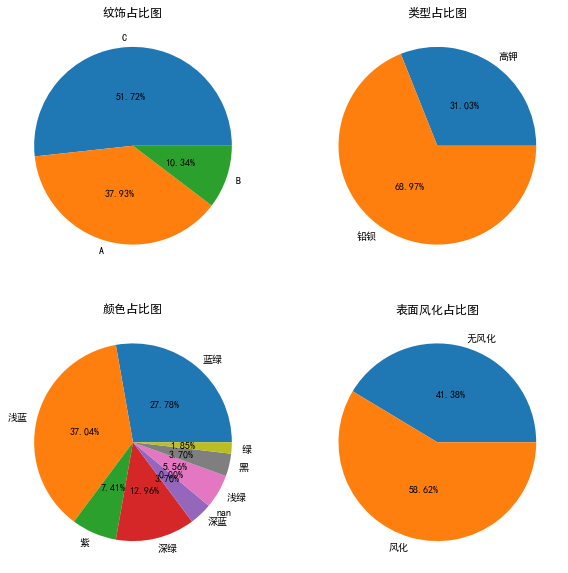

In [7]:
fig=plt.figure(figsize=(10,10))
i=1
for column in df_表单1.columns[1:]:
    data ={elem:np.sum(df_表单1[column]==elem) for elem in df_表单1[column].unique()}
    ax=fig.add_subplot(2,2,i)
    i+=1
    ax.pie(data.values(), labels=data.keys(), autopct='%1.2lf%%', pctdistance=0.5)
    ax.set_title(column+'占比图')
plt.savefig('各属性数量占比图.png')
plt.show()

In [1]:
import pandas as pd
df_表单2 = pd.read_excel('附件.xlsx', sheet_name='表单2')
df_表单2['采样点']=df_表单2['文物采样点'].apply(lambda x:x[2:])
df_表单2['文物编号']=df_表单2['文物采样点'].apply(lambda x:x[:2])
df_表单2=df_表单2.fillna(0)
print(df_表单2.shape)
df_表单2['总含量']=df_表单2[df_表单2.columns[1:15]].sum(axis=1)
index = df_表单2[df_表单2['总含量']<85].index
df_表单2=df_表单2.drop(index=index)
print(df_表单2.shape)
index = df_表单2[df_表单2['总含量']>105].index
df_表单2=df_表单2.drop(index=index)
print(df_表单2.shape)
for column in df_表单2.columns[1:15]:
    df_表单2[column]=df_表单2[column]/df_表单2['总含量']*100
df_表单2.head()

(69, 18)
(67, 19)
(67, 19)


,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),Unnamed: 15,采样点,文物编号,总含量
0,01,71.027559,0.0,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,97.61,,01,97.61
1,02,36.319952,0.0,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,99.89,,02,99.89
2,03部位1,87.050000,0.0,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.00,部位1,03,100.00
3,03部位2,62.408981,0.0,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,98.88,部位2,03,98.88
4,04,68.582136,0.0,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,96.06,,04,96.06


In [2]:
df_表单1['文物编号']=df_表单1['文物编号'].astype('str')
df_表单1['文物编号']=df_表单1['文物编号'].apply(lambda x:'0'*(2-len(x))+x)
df_表单1.index=df_表单1['文物编号']
columns = ['纹饰', '类型', '颜色', '表面风化']
df_表单2[columns]=''
for i in df_表单2.index:
    index = df_表单2['文物编号'][i]
    for column in columns:
        df_表单2.loc[i,column]=df_表单1[column][index]
df_表单2['颜色'].unique()
dic = {'风化':1,'无风化':0,
       'A':1,'C':0,  # 这里未对B进行转换，不过在apriori的地方使用的是汉字不影响，后续也没有使用
       '高钾':1,'铅钡':0,  
      '蓝绿':0, '浅蓝':1, '紫':2, '深绿':3, '深蓝':4, '浅绿':5, '黑':6, '绿':7}
df_表单2['是否风化']=df_表单2['表面风化'].apply(lambda x:dic.get(x))
df_表单2['类型是否高钾']=df_表单2['类型'].apply(lambda x:dic.get(x))
df_表单2['纹饰A']=df_表单2['纹饰'].apply(lambda x:dic.get(x))
df_表单2['颜色编号']=df_表单2['颜色'].apply(lambda x:dic.get(x))
columns = ['文物编号','采样点','是否风化','类型是否高钾','纹饰A','颜色编号']
columns.extend(df_表单2.columns[1:15])
df = df_表单2[columns]
df.to_excel('表单1-2合并.xlsx')
df

NameError: name 'df_表单1' is not defined

In [3]:
plt.figure(figsize=(10,10))
data = df[df.columns[5:]].mean()
print(data[data<=1].index)
value = list(data[data>1].values)+[sum(data[data<=1].values)]
labels = list(data[data>1].index)+['其他']
plt.pie(value, labels=labels, autopct='%1.2lf%%',colors=['aliceblue','antiquewhite','aqua','aquamarine','aliceblue',
'antiquewhite','aqua','aquamarine','azure','beige'])
plt.savefig('各成分平均占比图.png')
plt.show()

NameError: name 'plt' is not defined

Index(['颜色编号', '氧化钠(Na2O)', '氧化镁(MgO)', '氧化铅(PbO)', '氧化钡(BaO)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')


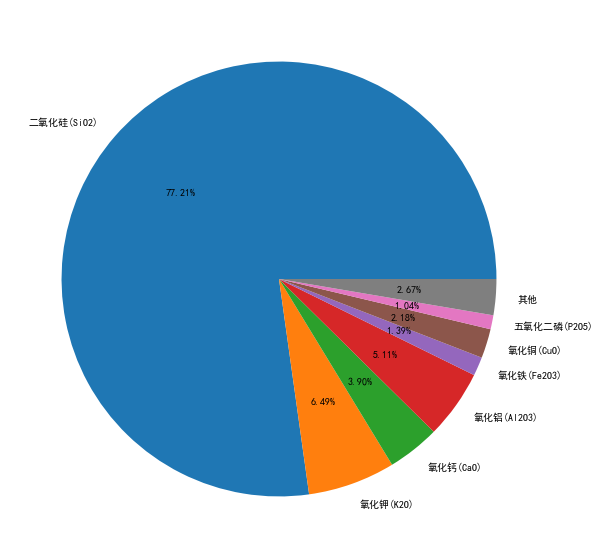

In [21]:
df1 = df[df['类型是否高钾']==1]
plt.figure(figsize=(10,10))
data = df1[df1.columns[5:]].mean()
print(data[data<=1].index)
value = list(data[data>1].values)+[sum(data[data<=1].values)]
labels = list(data[data>1].index)+['其他']
plt.pie(value, labels=labels, autopct='%1.2lf%%')
plt.savefig('类型为高钾的成分占比图.png')
plt.show()

Index(['氧化钠(Na2O)', '氧化钾(K2O)', '氧化镁(MgO)', '氧化铁(Fe2O3)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')


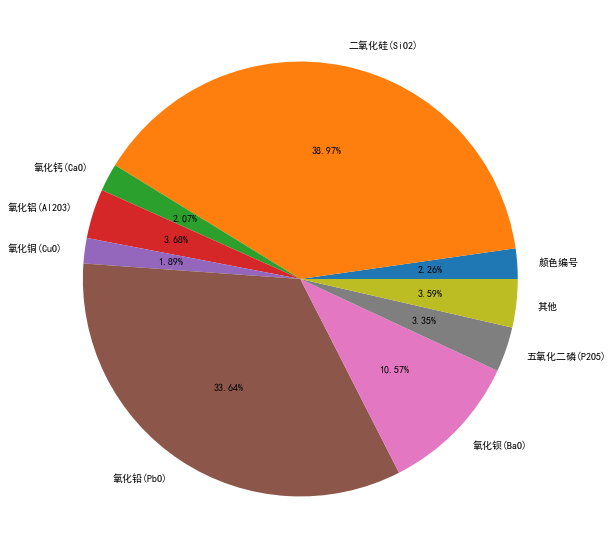

In [12]:
df1 = df[df['类型是否高钾']==0]
plt.figure(figsize=(10,10))
data = df1[df1.columns[5:]].mean()
print(data[data<=1].index)
value = list(data[data>1].values)+[sum(data[data<=1].values)]
labels = list(data[data>1].index)+['其他']
plt.pie(value, labels=labels, autopct='%1.2lf%%')
plt.savefig('类型为铅钡的成分占比图.png')
plt.show()